0.6924247664774021
0.8796977614968137


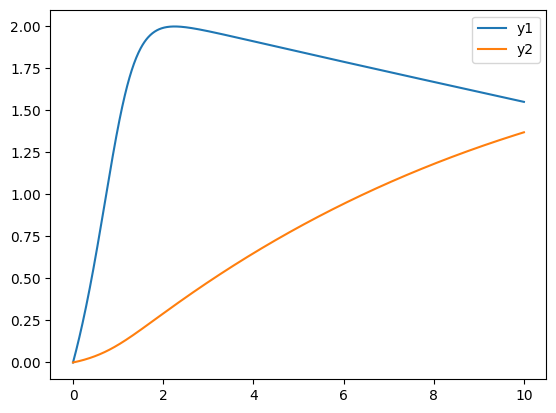

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import random

a=random.uniform(0.6, 0.8)
print(a)
b=random.uniform(0.7,0.9)
print(b)
eps=0.08

# Define the system of ODEs
def model(y, t):
    y1, y2 = y
    f1 = y1 - (y1**3)/3 -y2 + 1  # Define the function for dy1/dt
    f2 = eps*(y1+a-b*y2)  # Define the function for dy2/dt
    dydt = [f1, f2]
    return dydt

# Set initial conditions
y0 = [0, 0]

# Set the time points at which to solve the ODEs
t = np.linspace(0, 10, 1000)

# Solve the ODEs
solution = odeint(model, y0, t)

# Extract results for plotting or further analysis
y1_solution, y2_solution = solution[:, 0], solution[:, 1]

# Plot the results if needed
plt.plot(t, y1_solution, label='y1')
plt.plot(t, y2_solution, label='y2')
plt.legend()
plt.show()
